## Tour & Travels Customer Churn Prediction

### Project Introduction

### About this dataset
The Tour & Travels Customer Churn Prediction dataset assists a travel company in
predicting customer churn. It includes indicators such as age, frequent flyer status,
annual income class, services opted frequency, social media account
synchronization, and hotel bookings.

### Project Objectives

1. **Develop Predictive Models**: Create machine learning models, such as logistic regression and random forest, to predict customer churn in the tour and travel industry.

2. **Improve Accuracy**: Enhance the accuracy of churn prediction models by experimenting with different algorithms, such as logistic regression and random forest, and selecting the most effective one.

3. **EDA Insights**: Conduct Exploratory Data Analysis (EDA) to gain insights into the characteristics and patterns of customer churn, helping to inform model development and feature selection.

4. **Model Evaluation**: Evaluate the performance of developed models using appropriate metrics like accuracy, precision, recall, and F1-score to ensure the reliability and effectiveness of the predictive system.

5. **Business Recommendations**: Translate model predictions and insights into actionable business recommendations for the travel company to implement strategies for retaining customers and reducing churn rates.


In [1]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction")

Skipping, found downloaded files in ".\tour-travels-customer-churn-prediction" (use force=True to force download)


In [2]:

## importing library
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [3]:
## importing the datasets. 
df = pd.read_csv("tour-travels-customer-churn-prediction/Customertravel.csv")
print("done")

done


### EDA Before Preprocessing

In [4]:
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [8]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


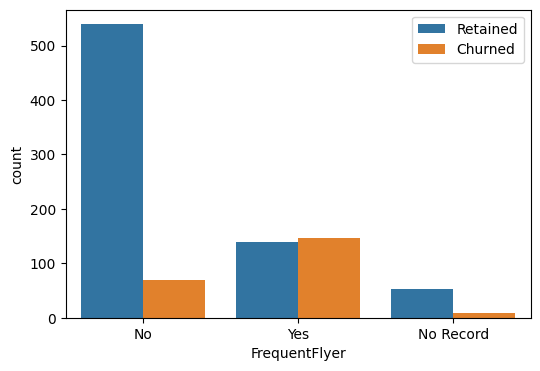

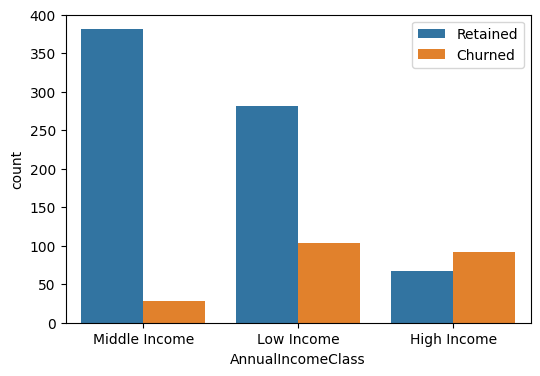

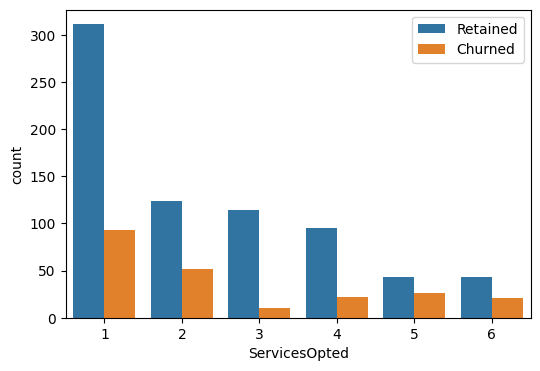

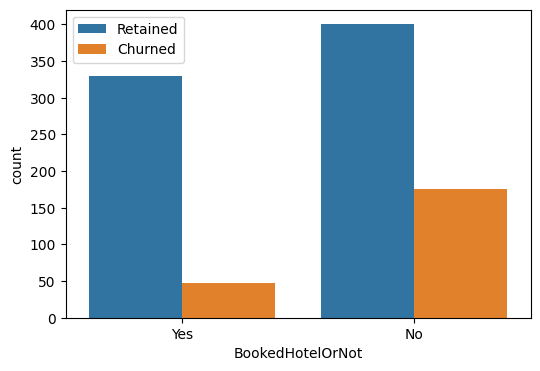

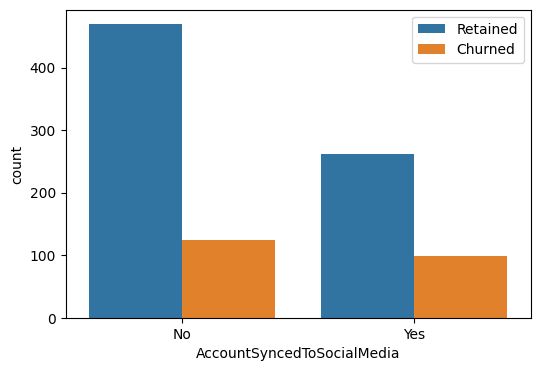

In [9]:
## creating a function to visualize the distribution of categorical variables as it relates to the rate of churn among customers. 
def plot(feature):
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df, hue='Target')
    plt.legend(labels=["Retained", "Churned"])
    plt.show()
    
    
df_cat = df[["FrequentFlyer", "AnnualIncomeClass", "ServicesOpted", "BookedHotelOrNot", 'AccountSyncedToSocialMedia']]

for i in df_cat:
    plot(i)
    


### Preprocesing and Feature Selection

In [10]:
## Selecting independent Variables 

X = df[["Age", "FrequentFlyer", "AnnualIncomeClass", "ServicesOpted", "BookedHotelOrNot", "AccountSyncedToSocialMedia"]].values
X[:5]

array([[34, 'No', 'Middle Income', 6, 'Yes', 'No'],
       [34, 'Yes', 'Low Income', 5, 'No', 'Yes'],
       [37, 'No', 'Middle Income', 3, 'No', 'Yes'],
       [30, 'No', 'Middle Income', 2, 'No', 'No'],
       [30, 'No', 'Low Income', 1, 'No', 'No']], dtype=object)

In [11]:
## Label Encoding. 
# Create separate instances of OrdinalEncoder for each column
encoder1 = preprocessing.OrdinalEncoder()
encoder2 = preprocessing.OrdinalEncoder()
encoder3 = preprocessing.OrdinalEncoder()

# Reshaping each column to a 2D array before fitting the encoder
# This is necessary because OrdinalEncoder expects a 2D array as input
X[:, 1] = encoder1.fit_transform(X[:, 1].reshape(-1, 1)).flatten()
X[:, 2] = encoder2.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
X[:, 4] = encoder3.fit_transform(X[:, 4].reshape(-1, 1)).flatten()
X[:, 5] = encoder3.fit_transform(X[:, 5].reshape(-1, 1)).flatten()

# The reshape(-1, 1) operation converts the 1D array of column values into a 2D array
# with a single column, which is the format expected by the fit_transform method.
# After encoding, the flatten() method is used to convert the 2D array back to a 1D array
# so that it can be assigned to the original column in X.
X[:5]

array([[34, 0.0, 2.0, 6, 1.0, 0.0],
       [34, 2.0, 1.0, 5, 0.0, 1.0],
       [37, 0.0, 2.0, 3, 0.0, 1.0],
       [30, 0.0, 2.0, 2, 0.0, 0.0],
       [30, 0.0, 1.0, 1, 0.0, 0.0]], dtype=object)

In [12]:
## changing our data into intergers as it is a requirment for Scikit-learn algorithm. 
X = X.astype(int)

In [13]:
## changing our data into intergers as it is a requirment for Scikit-learn algorithm.
y = df['Target'].values
y= y.astype(int)

In [14]:
### normalizing data using Standard scaling such that the mean is 0 and standard deviation is 1. 
X = preprocessing.StandardScaler().fit(X).transform(X)

### Train Test Data Splitting

In [15]:
## selecting train test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (763, 6)
y_train shape (763,)


### Modeling (Logistic Regression with Scikit-learn)

In [16]:
## creating the Logistic Regression instance. 
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [17]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
yhat_proba = LR.predict_proba(X_test)
yhat_proba[:5]

array([[0.56087275, 0.43912725],
       [0.82376579, 0.17623421],
       [0.50590597, 0.49409403],
       [0.80019368, 0.19980632],
       [0.78412861, 0.21587139]])

## Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 15  28]
 [  7 141]]


Confusion matrix, without normalization
[[ 15  28]
 [  7 141]]


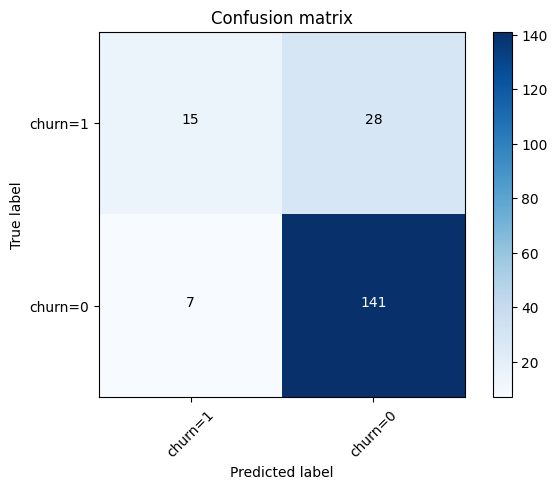

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_proba)

0.4546912549193733

In [23]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8011363636363636

In [33]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))

Accuracy: 0.8167539267015707
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       148
           1       0.68      0.35      0.46        43

    accuracy                           0.82       191
   macro avg       0.76      0.65      0.68       191
weighted avg       0.80      0.82      0.79       191



### Creating a Random Forest Model 

I am going to create the same model with Random forests to see how the accutacy of my model in predicting churn customers will performed compared to my Logistic Regression Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

In [27]:
# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [28]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [29]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8743455497382199
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       148
           1       0.77      0.63      0.69        43

    accuracy                           0.87       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.87      0.87      0.87       191



In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 27  16]
 [  8 140]]


Confusion matrix, without normalization
[[ 27  16]
 [  8 140]]


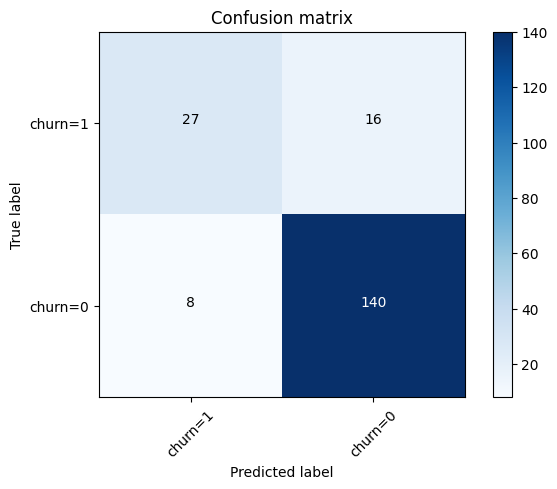

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Insights:

1. **Accuracy**: 
   - Random Forest: Achieved an accuracy of approximately 87.43%, indicating that the model correctly predicted the churn or non-churn status of customers in the dataset with high accuracy.
   - Logistic Regression: Attained an accuracy of around 81.68%, which is slightly lower compared to the Random Forest model but still demonstrates reasonably good predictive performance.

2. **Precision and Recall**:
   - Random Forest: Demonstrated a higher precision of approximately 77% and recall of around 63% for predicting customer churn (class 1), indicating that when the model predicts churn, it is correct about 77% of the time, and it captures about 63% of the actual churn instances.
   - Logistic Regression: Exhibited a lower precision of approximately 68% and recall of around 35% for predicting customer churn, suggesting that while the model identifies some churn instances, it also generates more false positives and misses a significant portion of actual churn cases.

3. **F1-Score**:
   - Random Forest: Achieved an F1-score of approximately 0.69 for predicting customer churn, which is a harmonic mean of precision and recall. It indicates a balanced performance in terms of both precision and recall.
   - Logistic Regression: Obtained a lower F1-score of around 0.46 for predicting customer churn, implying that the model's overall performance in capturing true positives and minimizing false positives is less balanced compared to the Random Forest model.

4. **Support**:
   - Both models were evaluated on a dataset consisting of 191 samples, with class 0 (non-churn) having a higher support than class 1 (churn), indicating class imbalance in the dataset.

5. **Conclusion**:
   - The Random Forest model outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score for predicting customer churn.
   - The Random Forest model demonstrates a better balance between precision and recall, making it more suitable for identifying churn instances while minimizing false positives.
   - Based on these results, it is recommended to deploy the Random Forest model for predicting customer churn in the tour and travel industry, as it offers higher predictive performance and reliability.